In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Load the dataset
data = pd.read_csv("diabetes.csv")

In [32]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [33]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [34]:
# Display basic statistics of the population
population_stats = data.describe()
print("Population Statistics of Glucose:")
print(population_stats["Glucose"])

Population Statistics of Glucose:
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


In [35]:
# Setting seed for reproducibility
np.random.seed(42)

# Taking a random sample of 25 observations
sample = data.sample(n=25)

# Calculating mean and highest Glucose values of the sample
sample_mean_glucose = sample["Glucose"].mean()
sample_highest_glucose = sample["Glucose"].max()

print("\nSample Statistics of Glucose:")
print("Mean Glucose in Sample:", sample_mean_glucose)
print("Highest Glucose in Sample:", sample_highest_glucose)



Sample Statistics of Glucose:
Mean Glucose in Sample: 116.64
Highest Glucose in Sample: 183


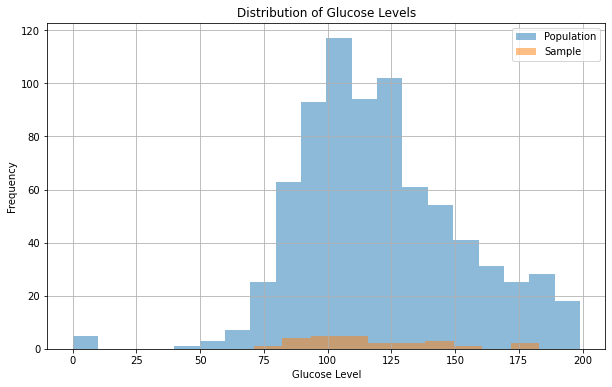

In [36]:
# Plotting
plt.figure(figsize=(10, 6))

# Population Glucose distribution
plt.hist(data["Glucose"], bins=20, alpha=0.5, label="Population")

# Sample Glucose distribution
plt.hist(sample["Glucose"], bins=10, alpha=0.5, label="Sample")

plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

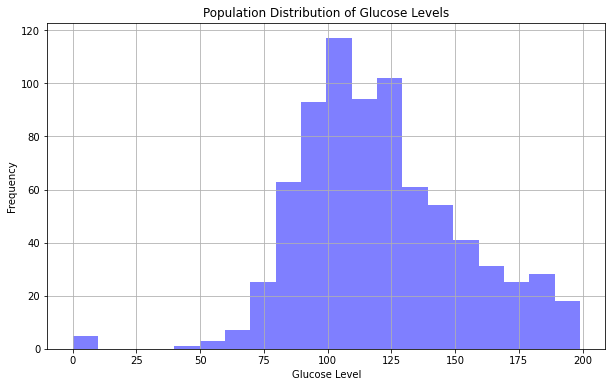

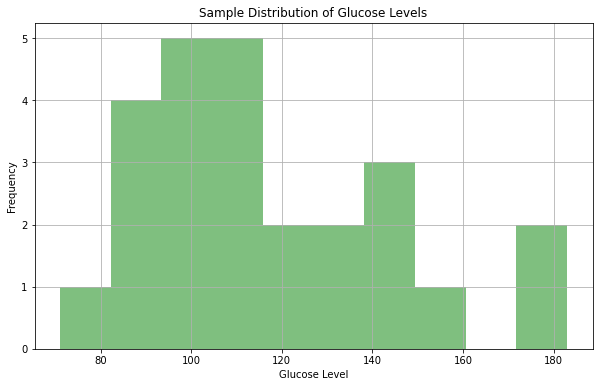

In [37]:
# Comparing with different histograms

# Plotting the population distribution
plt.figure(figsize=(10, 6))
plt.hist(data["Glucose"], bins=20, alpha=0.5, color='blue')
plt.title("Population Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plotting the sample distribution
plt.figure(figsize=(10, 6))
plt.hist(sample["Glucose"], bins=10, alpha=0.5, color='green')
plt.title("Sample Distribution of Glucose Levels")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# 2b

In [38]:
# Calculate 98th percentile of BMI for population
population_bmi_98th_percentile = np.percentile(data["BMI"], 98)

# Calculate 98th percentile of BMI for sample
sample_bmi_98th_percentile = np.percentile(sample["BMI"], 98)

print("98th Percentile of BMI for Population:", population_bmi_98th_percentile)
print("98th Percentile of BMI for Sample:", sample_bmi_98th_percentile)

98th Percentile of BMI for Population: 47.52599999999996
98th Percentile of BMI for Sample: 40.248000000000005


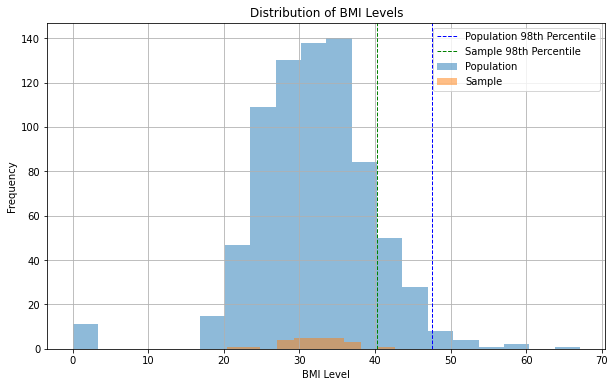

In [39]:
# Plotting
plt.figure(figsize=(10, 6))

# Population BMI distribution
plt.hist(data["BMI"], bins=20, alpha=0.5, label="Population")

# Sample BMI distribution
plt.hist(sample["BMI"], bins=10, alpha=0.5, label="Sample")

# Adding vertical lines for 98th percentiles
plt.axvline(population_bmi_98th_percentile, color='blue', linestyle='dashed', linewidth=1, label='Population 98th Percentile')
plt.axvline(sample_bmi_98th_percentile, color='green', linestyle='dashed', linewidth=1, label='Sample 98th Percentile')

plt.title("Distribution of BMI Levels")
plt.xlabel("BMI Level")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


# 2c

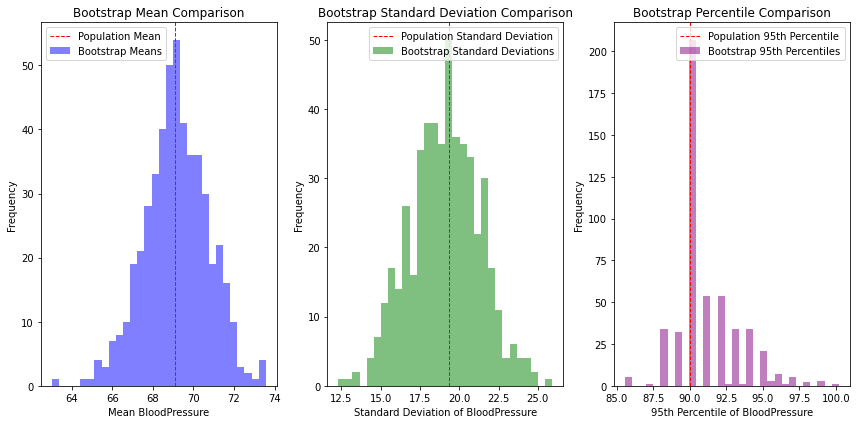

In [40]:
# Defining a function to perform bootstrap sampling
def bootstrap_sampling(data, n_samples, sample_size):
    bootstrap_samples = []
    for _ in range(n_samples):
        sample = data.sample(n=sample_size, replace=True)
        bootstrap_samples.append(sample)
    return bootstrap_samples

# Performing bootstrap sampling
n_bootstrap_samples = 500
bootstrap_samples = bootstrap_sampling(data["BloodPressure"], n_bootstrap_samples, 150)

# Calculating statistics for each bootstrap sample
bootstrap_means = [sample.mean() for sample in bootstrap_samples]
bootstrap_std_devs = [sample.std() for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]

# Calculating statistics for the population
population_mean = data["BloodPressure"].mean()
population_std_dev = data["BloodPressure"].std()
population_percentile = np.percentile(data["BloodPressure"], 95)

# Plotting
plt.figure(figsize=(12, 6))

# Bootstrap mean comparison
plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, alpha=0.5, color='blue', label='Bootstrap Means')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1, label='Population Mean')
plt.title('Bootstrap Mean Comparison')
plt.xlabel('Mean BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Bootstrap standard deviation comparison
plt.subplot(1, 3, 2)
plt.hist(bootstrap_std_devs, bins=30, alpha=0.5, color='green', label='Bootstrap Standard Deviations')
plt.axvline(population_std_dev, color='red', linestyle='dashed', linewidth=1, label='Population Standard Deviation')
plt.title('Bootstrap Standard Deviation Comparison')
plt.xlabel('Standard Deviation of BloodPressure')
plt.ylabel('Frequency')
plt.legend()

# Bootstrap percentile comparison
plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=30, alpha=0.5, color='purple', label='Bootstrap 95th Percentiles')
plt.axvline(population_percentile, color='red', linestyle='dashed', linewidth=1, label='Population 95th Percentile')
plt.title('Bootstrap Percentile Comparison')
plt.xlabel('95th Percentile of BloodPressure')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()
